In [87]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
filepath = lambda x: os.path.join('data', x) 

In [4]:
pd.read_csv(filepath('lap_times.csv'))

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
538116,1096,822,53,16,1:32.998,92998
538117,1096,822,54,16,1:32.995,92995
538118,1096,822,55,16,1:31.236,91236
538119,1096,822,56,15,1:30.566,90566


In [5]:
os.listdir('data')

['.ipynb_checkpoints',
 'circuits.csv',
 'constructors.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'drivers.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

In [6]:
races = pd.read_csv(filepath('races.csv'))
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [7]:
circuits = pd.read_csv(filepath('circuits.csv'))
const = pd.read_csv(filepath('constructors.csv'))
const_res = pd.read_csv(filepath('constructor_results.csv'))
const_stand = pd.read_csv(filepath('constructor_standings.csv'))

In [8]:
print(const_res.constructorResultsId.is_unique)
const_res = const_res.set_index('constructorResultsId')
const_stand = const_stand.set_index('constructorStandingsId')

True


In [9]:
const_results = const.merge(const_res, on='constructorId', how='right')
const_results

,constructorId,constructorRef,name,nationality,url,raceId,points,status
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N
...,...,...,...,...,...,...,...,...
12165,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N
12166,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N
12167,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N
12168,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N


In [10]:
const_full = const_results.merge(const_stand, on=['constructorId','raceId'], suffixes=['','_stand']).rename(columns={'points_stand':'points_cumu'})
const_full

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,positionText,wins
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,1,1
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,3,0
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,2,0
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,4,0
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,7,0
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,9,0
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,6,0
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,10,0


In [11]:
full = const_full.merge(races.rename(columns={'name': 'race_name', 'url':'race_url'}), on='raceId')

In [12]:
full

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N


In [13]:
full_reduced = full.drop(columns=['fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'race_url', 'sprint_time'])
full_reduced

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,positionText,wins,year,round,circuitId,race_name,date,time
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,1,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,3,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,2,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,4,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,5,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,7,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,9,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,6,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,10,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00


In [14]:
data = full_reduced
data

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,positionText,wins,year,round,circuitId,race_name,date,time
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,1,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,3,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,2,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,4,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,5,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,7,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,9,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,6,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,10,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00


In [15]:
# Create 
data['points_2022'] = data.groupby('raceId')['points'].rank(method='max', ascending=False).map({
        1:25,
        2:18,
        3:15,
        4:12,
        5:10,
        6:8,
        7:6,
        8:4,
        9:2,
        10:1
    }).fillna(0)
data

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,positionText,wins,year,round,circuitId,race_name,date,time,points_2022
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,1,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,25.0
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,3,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,15.0
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,2,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,18.0
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,4,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,12.0
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,5,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,7,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,8.0
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,9,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,1.0
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,6,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,1.0
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,10,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,1.0


In [16]:
normal = data['points_2022']
condensed = data[['constructorId','constructorRef','name','raceId','position',
                  'year','round','circuitId','date']]
condensed['pointsNormalized'] = normal
condensed

,constructorId,constructorRef,name,raceId,position,year,round,circuitId,date,pointsNormalized
0,1,mclaren,McLaren,18,1,2008,1,1,2008-03-16,25.0
1,2,bmw_sauber,BMW Sauber,18,3,2008,1,1,2008-03-16,15.0
2,3,williams,Williams,18,2,2008,1,1,2008-03-16,18.0
3,4,renault,Renault,18,4,2008,1,1,2008-03-16,12.0
4,5,toro_rosso,Toro Rosso,18,5,2008,1,1,2008-03-16,10.0
...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,1096,7,2022,22,24,2022-11-20,8.0
12033,213,alphatauri,AlphaTauri,1096,9,2022,22,24,2022-11-20,1.0
12034,51,alfa,Alfa Romeo,1096,6,2022,22,24,2022-11-20,1.0
12035,3,williams,Williams,1096,10,2022,22,24,2022-11-20,1.0


In [17]:
#The different eras from my major regulations research
eras = {1:(1958,1982),2:(1983,1993),3:(1994,2008),4:(2009,2014),5:(2014,2021),6:(2022,2023)}
condensed['era'] = 0

In [18]:
#putting each constructor in each race into an era
for i in condensed.index:
    if condensed['year'][i] <= 1982:
        condensed['era'][i] = 1
    elif condensed['year'][i] <= 1993:
        condensed['era'][i] = 2
    elif condensed['year'][i] <= 2008:
        condensed['era'][i] = 3
    elif condensed['year'][i] <= 2014:
        condensed['era'][i] = 4
    elif condensed['year'][i] <= 2021:
        condensed['era'][i] = 5
    else:
        condensed['era'][i] = 6
        
condensed

,constructorId,constructorRef,name,raceId,position,year,round,circuitId,date,pointsNormalized,era
0,1,mclaren,McLaren,18,1,2008,1,1,2008-03-16,25.0,3
1,2,bmw_sauber,BMW Sauber,18,3,2008,1,1,2008-03-16,15.0,3
2,3,williams,Williams,18,2,2008,1,1,2008-03-16,18.0,3
3,4,renault,Renault,18,4,2008,1,1,2008-03-16,12.0,3
4,5,toro_rosso,Toro Rosso,18,5,2008,1,1,2008-03-16,10.0,3
...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,1096,7,2022,22,24,2022-11-20,8.0,6
12033,213,alphatauri,AlphaTauri,1096,9,2022,22,24,2022-11-20,1.0,6
12034,51,alfa,Alfa Romeo,1096,6,2022,22,24,2022-11-20,1.0,6
12035,3,williams,Williams,1096,10,2022,22,24,2022-11-20,1.0,6


In [19]:
#30 teams with most total points
most_points = condensed.groupby('name')['pointsNormalized'].sum().sort_values()[-30:].index

indexes = []
for name in most_points:
    indexes += list(condensed[condensed['name']==name].index)
    
only_most_points = condensed.iloc[indexes]
only_most_points

,constructorId,constructorRef,name,raceId,position,year,round,circuitId,date,pointsNormalized,era
11431,213,alphatauri,AlphaTauri,1031,5,2020,1,70,2020-07-05,10.0,5
11442,213,alphatauri,AlphaTauri,1032,7,2020,2,70,2020-07-12,8.0,5
11454,213,alphatauri,AlphaTauri,1033,7,2020,3,11,2020-07-19,1.0,5
11462,213,alphatauri,AlphaTauri,1034,7,2020,4,9,2020-08-02,8.0,5
11473,213,alphatauri,AlphaTauri,1035,7,2020,5,9,2020-08-09,6.0,5
...,...,...,...,...,...,...,...,...,...,...,...
11988,6,ferrari,Ferrari,1092,2,2022,18,22,2022-10-09,15.0,6
11999,6,ferrari,Ferrari,1093,2,2022,19,69,2022-10-23,15.0,6
12009,6,ferrari,Ferrari,1094,2,2022,20,32,2022-10-30,15.0,6
12018,6,ferrari,Ferrari,1095,2,2022,21,18,2022-11-13,18.0,6


In [20]:
#grouping constructors by era they competed in
by_era = only_most_points.groupby(['era','name'])['pointsNormalized'].sum()
by_era

era  name         
1    Alfa Romeo        102.0
     Arrows            215.0
     BRM              1811.0
     Brabham          1545.0
     Cooper-Climax     918.0
                       ...  
6    Haas F1 Team       68.0
     McLaren           200.0
     Mercedes          361.0
     Red Bull          469.0
     Williams           51.0
Name: pointsNormalized, Length: 82, dtype: float64

In [21]:
most_points

Index(['AlphaTauri', 'Haas F1 Team', 'McLaren-Ford', 'Honda', 'Alfa Romeo',
       'Lotus-Ford', 'March', 'Lotus F1', 'BAR', 'BMW Sauber', 'Arrows',
       'Lotus-Climax', 'Toyota', 'Cooper-Climax', 'Toro Rosso', 'Jordan',
       'Ligier', 'Force India', 'Sauber', 'BRM', 'Brabham', 'Tyrrell',
       'Benetton', 'Team Lotus', 'Renault', 'Mercedes', 'Red Bull', 'Williams',
       'McLaren', 'Ferrari'],
      dtype='object', name='name')

In [22]:
#assigning points to each of the constructors in most_points
points_per_era = {1:[],2:[],3:[],4:[],5:[],6:[]}

for i in range(1,7):
    for name in most_points:
        in_era = by_era[i].index
        if name in in_era:
            points_per_era[i].append(by_era[(i,name)])
        else:
            points_per_era[i].append(0)

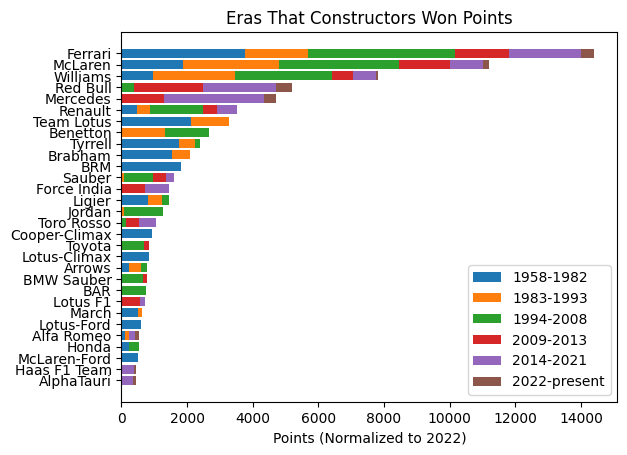

In [23]:
#graphing constructors with the most point broken down by the era they won the points in
groups = list(most_points)
values = np.array([points_per_era[1],points_per_era[2],
                   points_per_era[3],points_per_era[4],
                   points_per_era[5],points_per_era[6]])
eras = ['1958-1982','1983-1993','1994-2008','2009-2013','2014-2021','2022-present']

fig, ax = plt.subplots()

for i in range(values.shape[0]):
    ax.barh(groups, values[i], left = np.sum(values[:i], axis = 0),label=eras[i])

ax.set_xlabel('Points (Normalized to 2022)')
ax.set_title('Eras That Constructors Won Points')
ax.legend();

In [24]:
#grouping constructors by era for comparison
constructor_by_era = only_most_points.groupby(['era','name'])['pointsNormalized'].agg(['sum','mean'])

In [25]:
#top 10 constructors in each era
best_in_era = {1:[],2:[],3:[],4:[],5:[],6:[]}

for i in range(1,7):
    era_sort = pd.Series(constructor_by_era.loc[i].sort_values('sum',ascending=False)[:10].index)
    best_in_era[i].append(era_sort)

best_in_era

{1: [0          Ferrari
  1       Team Lotus
  2          McLaren
  3              BRM
  4          Tyrrell
  5          Brabham
  6         Williams
  7    Cooper-Climax
  8     Lotus-Climax
  9           Ligier
  Name: name, dtype: object],
 2: [0       McLaren
  1      Williams
  2       Ferrari
  3      Benetton
  4    Team Lotus
  5       Brabham
  6       Tyrrell
  7        Ligier
  8       Renault
  9        Arrows
  Name: name, dtype: object],
 3: [0       Ferrari
  1       McLaren
  2      Williams
  3       Renault
  4      Benetton
  5        Jordan
  6        Sauber
  7           BAR
  8        Toyota
  9    BMW Sauber
  Name: name, dtype: object],
 4: [0       Red Bull
  1        Ferrari
  2        McLaren
  3       Mercedes
  4    Force India
  5       Williams
  6       Lotus F1
  7        Renault
  8         Sauber
  9     Toro Rosso
  Name: name, dtype: object],
 5: [0        Mercedes
  1        Red Bull
  2         Ferrari
  3         McLaren
  4     Force India
  5  

In [26]:
#winners of the constructors championship by year
tot_pts_yearly = condensed.groupby(['year','name'])['pointsNormalized'].agg(['sum'])

winners = {}
for year in tot_pts_yearly.index.get_level_values(0):
    winners[year] = tot_pts_yearly.loc[year].sort_values('sum',ascending=False).index[0]

In [27]:
#assigns the end of season rank to each constructor each year

fin_positions = []
count = 0
for year in list(tot_pts_yearly.index.get_level_values(0).unique()):

    fin_order = tot_pts_yearly.loc[year].reset_index().sort_values('sum',ascending=False)['name']\
                    .reset_index(drop=True).reset_index().set_index('name')

    constructors = list(tot_pts_yearly.loc[year].index)

    for i in range(0,len(constructors)):
        fin_positions.append(fin_order.loc[constructors[i]][0] + 1)
        
tot_pts_yearly['Season Rank'] = fin_positions
tot_pts_yearly

sum  Season Rank
year name                            
1958 BRM           109.0            4
     Connaught      10.0            8
     Cooper        148.0            3
     Ferrari       192.0            1
     Maserati       84.0            5
...                  ...          ...
2022 Haas F1 Team   68.0            9
     McLaren       200.0            5
     Mercedes      361.0            3
     Red Bull      469.0            1
     Williams       51.0           10

[899 rows x 2 columns]

In [28]:
#defining results table
results = pd.read_csv(filepath('results.csv'))
results = results.replace('\\N', np.NaN)
results = results[['resultId','raceId','driverId','constructorId','positionOrder']]
results

,resultId,raceId,driverId,constructorId,positionOrder
0,1,18,1,1,1
1,2,18,2,2,2
2,3,18,3,3,3
3,4,18,4,4,4
4,5,18,5,1,5
...,...,...,...,...,...
25835,25841,1096,854,210,16
25836,25842,1096,825,210,17
25837,25843,1096,1,131,18
25838,25844,1096,849,3,19


In [29]:
#normalizing to 2022 points system
results['pointsNormalized'] = results.groupby('raceId')['positionOrder'].rank(method='max', ascending=True).map({
        1:25,
        2:18,
        3:15,
        4:12,
        5:10,
        6:8,
        7:6,
        8:4,
        9:2,
        10:1
    }).fillna(0)
results

,resultId,raceId,driverId,constructorId,positionOrder,pointsNormalized
0,1,18,1,1,1,25.0
1,2,18,2,2,2,18.0
2,3,18,3,3,3,15.0
3,4,18,4,4,4,12.0
4,5,18,5,1,5,10.0
...,...,...,...,...,...,...
25835,25841,1096,854,210,16,0.0
25836,25842,1096,825,210,17,0.0
25837,25843,1096,1,131,18,0.0
25838,25844,1096,849,3,19,0.0


In [30]:
#defining smaller constructor dataframe to combine
constructors = pd.read_csv(filepath('constructors.csv'))
constructors = constructors.replace('\\N', np.NaN)
constructors = constructors[['constructorId','name']]

In [31]:
#defining races table
races = pd.read_csv(filepath('races.csv'))
races = races.replace('\\N', np.NaN)
races = races[['raceId','year']]

In [32]:
#combining results, races, and constructors table
combined = results.merge(races,how='inner',left_on='raceId',right_on='raceId')
combined = combined.merge(constructors,how='left',left_on='constructorId',right_on='constructorId')
combined = combined[combined['year']>=1958]
combined

,resultId,raceId,driverId,constructorId,positionOrder,pointsNormalized,year,name
0,1,18,1,1,1,25.0,2008,McLaren
1,2,18,2,2,2,18.0,2008,BMW Sauber
2,3,18,3,3,3,15.0,2008,Williams
3,4,18,4,4,4,12.0,2008,Renault
4,5,18,5,1,5,10.0,2008,McLaren
...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,16,0.0,2022,Haas F1 Team
25836,25842,1096,825,210,17,0.0,2022,Haas F1 Team
25837,25843,1096,1,131,18,0.0,2022,Mercedes
25838,25844,1096,849,3,19,0.0,2022,Williams


In [33]:
#removing names of constructors that are in the combined dataset but not in condensed dataset
com_not_con = []

for name in combined['name'].unique():
    if name not in condensed['name'].unique():
        com_not_con.append(name)
        
for name in com_not_con:
    combined = combined[combined['name'] != name]
    
combined = combined[combined['name'] != 'Kurtis Kraft']
combined = combined[combined['name'] != 'Eagle-Climax']
combined = combined[combined['name'] != 'Lola']

combined

,resultId,raceId,driverId,constructorId,positionOrder,pointsNormalized,year,name
0,1,18,1,1,1,25.0,2008,McLaren
1,2,18,2,2,2,18.0,2008,BMW Sauber
2,3,18,3,3,3,15.0,2008,Williams
3,4,18,4,4,4,12.0,2008,Renault
4,5,18,5,1,5,10.0,2008,McLaren
...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,16,0.0,2022,Haas F1 Team
25836,25842,1096,825,210,17,0.0,2022,Haas F1 Team
25837,25843,1096,1,131,18,0.0,2022,Mercedes
25838,25844,1096,849,3,19,0.0,2022,Williams


In [34]:
condensed[condensed['name']=='Kurtis Kraft']

,constructorId,constructorRef,name,raceId,position,year,round,circuitId,date,pointsNormalized,era
9121,113,kurtis_kraft,Kurtis Kraft,764,7,1959,9,63,1959-12-12,0.0,1


In [35]:
combined[combined['name']=='Kurtis Kraft']

,resultId,raceId,driverId,constructorId,positionOrder,pointsNormalized,year,name


In [36]:
#grouping the data by year and driver to get overall season standings
combined = combined.groupby(['year','driverId','name'])['pointsNormalized'].agg(['sum'])
combined

sum
year driverId name              
1958 289      Team Lotus     8.0
     347      BRM           12.0
              Maserati      11.0
     356      Cooper        38.0
     360      Cooper        10.0
...                          ...
2022 849      Williams       2.0
     852      AlphaTauri    12.0
     854      Haas F1 Team  12.0
     855      Alfa Romeo     6.0
     856      Williams       2.0

[2582 rows x 1 columns]

In [37]:
#ranking the drivers for each year and giving them a ranking value
fin_positions = []
count = 0
for year in list(combined.index.get_level_values(0).unique()):

    fin_order = combined.loc[year].reset_index().sort_values('sum',ascending=False).reset_index(drop=True)\
                    .reset_index().set_index(['driverId','name'])

    drivers = list(combined.loc[year].index)

    for i in range(0,len(drivers)):
        fin_positions.append(fin_order.loc[drivers[i]][0] + 1)
        
combined['Driver Season Rank'] = fin_positions
combined

sum  Driver Season Rank
year driverId name                                  
1958 289      Team Lotus     8.0                24.0
     347      BRM           12.0                19.0
              Maserati      11.0                20.0
     356      Cooper        38.0                11.0
     360      Cooper        10.0                22.0
...                          ...                 ...
2022 849      Williams       2.0                20.0
     852      AlphaTauri    12.0                16.0
     854      Haas F1 Team  12.0                17.0
     855      Alfa Romeo     6.0                18.0
     856      Williams       2.0                21.0

[2582 rows x 2 columns]

In [38]:
cons_data = tot_pts_yearly
driver_data = combined

In [39]:
#adding the constructor rank to the dataset that has the rank for each driver
cons_rank = []
for year in cons_data.index.get_level_values(0).unique():
    for name in driver_data.loc[year].index.get_level_values(1):
        cons_rank.append(cons_data.loc[(year,name)]['Season Rank'])
        
driver_data['Constructor Season Rank'] = cons_rank

In [40]:
#removing the rankings that make the data difficult to read (current rules only 10 teams, 20 drivers total)
driver_data = driver_data[driver_data['Driver Season Rank'] <= 25]
driver_data = driver_data[driver_data['Constructor Season Rank'] <= 12]
driver_data = driver_data.reset_index()
driver_data

,year,driverId,name,sum,Driver Season Rank,Constructor Season Rank
0,1958,289,Team Lotus,8.0,24.0,6.0
1,1958,347,BRM,12.0,19.0,4.0
2,1958,347,Maserati,11.0,20.0,5.0
3,1958,356,Cooper,38.0,11.0,3.0
4,1958,360,Cooper,10.0,22.0,3.0
...,...,...,...,...,...,...
1540,2022,849,Williams,2.0,20.0,10.0
1541,2022,852,AlphaTauri,12.0,16.0,8.0
1542,2022,854,Haas F1 Team,12.0,17.0,9.0
1543,2022,855,Alfa Romeo,6.0,18.0,7.0


In [122]:
#putting each constructor in each race into an era
driver_data['era'] = 0
for i in driver_data.index:
    if driver_data['year'][i] <= 1982:
        driver_data['era'][i] = 1
    elif driver_data['year'][i] <= 1993:
        driver_data['era'][i] = 2
    elif driver_data['year'][i] <= 2008:
        driver_data['era'][i] = 3
    elif driver_data['year'][i] <= 2014:
        driver_data['era'][i] = 4
    elif driver_data['year'][i] <= 2021:
        driver_data['era'][i] = 5
    else:
        driver_data['era'][i] = 6
        
driver_data

,year,driverId,name,sum,Driver Season Rank,Constructor Season Rank,era
0,1958,289,Team Lotus,8.0,24.0,6.0,1
1,1958,347,BRM,12.0,19.0,4.0,1
2,1958,347,Maserati,11.0,20.0,5.0,1
3,1958,356,Cooper,38.0,11.0,3.0,1
4,1958,360,Cooper,10.0,22.0,3.0,1
...,...,...,...,...,...,...,...
1540,2022,849,Williams,2.0,20.0,10.0,6
1541,2022,852,AlphaTauri,12.0,16.0,8.0,6
1542,2022,854,Haas F1 Team,12.0,17.0,9.0,6
1543,2022,855,Alfa Romeo,6.0,18.0,7.0,6


Correlation Coefficient: 0.6580537987157785


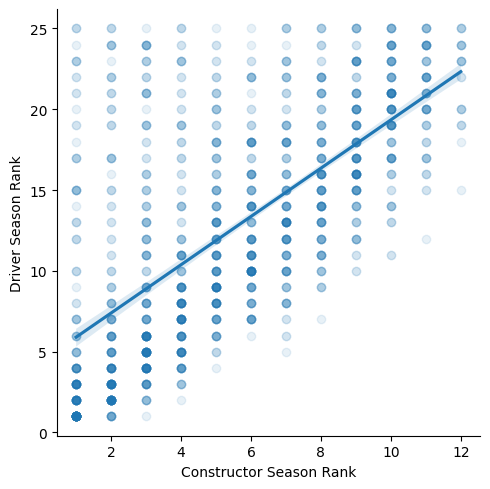

In [123]:
#plot showing relationship between driver and constructor rankings
sns.lmplot(x='Constructor Season Rank',y='Driver Season Rank',data=driver_data,\
           scatter_kws={'alpha':0.1});

r = stats.pearsonr(driver_data['Constructor Season Rank'],driver_data['Driver Season Rank'])[0]
print('Correlation Coefficient: ' + str(r))

In [124]:
most_points

Index(['AlphaTauri', 'Haas F1 Team', 'McLaren-Ford', 'Honda', 'Alfa Romeo',
       'Lotus-Ford', 'March', 'Lotus F1', 'BAR', 'BMW Sauber', 'Arrows',
       'Lotus-Climax', 'Toyota', 'Cooper-Climax', 'Toro Rosso', 'Jordan',
       'Ligier', 'Force India', 'Sauber', 'BRM', 'Brabham', 'Tyrrell',
       'Benetton', 'Team Lotus', 'Renault', 'Mercedes', 'Red Bull', 'Williams',
       'McLaren', 'Ferrari'],
      dtype='object', name='name')

Correlation Coefficient: 0.5967831868668093


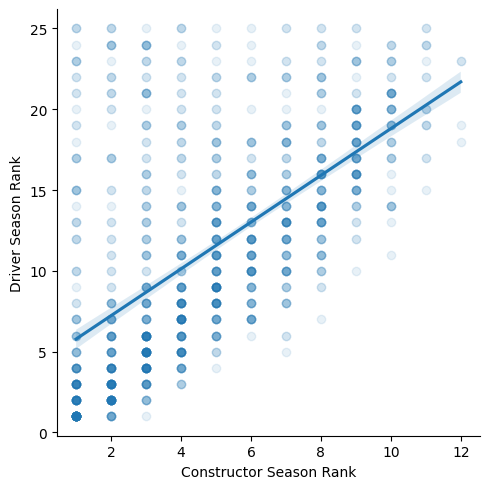

In [125]:
#plot showing the relationship between driver and constructor rankings for the top 30 teams
top30_teams = []
for i in range(len(driver_data)):
    if driver_data['name'][i] in most_points:
        top30_teams.append(i)
        
only_top30_teams = driver_data.iloc[top30_teams]

sns.lmplot(x='Constructor Season Rank',y='Driver Season Rank',data=only_top30_teams,\
           scatter_kws={'alpha':0.1});

r = stats.pearsonr(only_top30_teams['Constructor Season Rank'],only_top30_teams['Driver Season Rank'])[0]
print('Correlation Coefficient: ' + str(r))

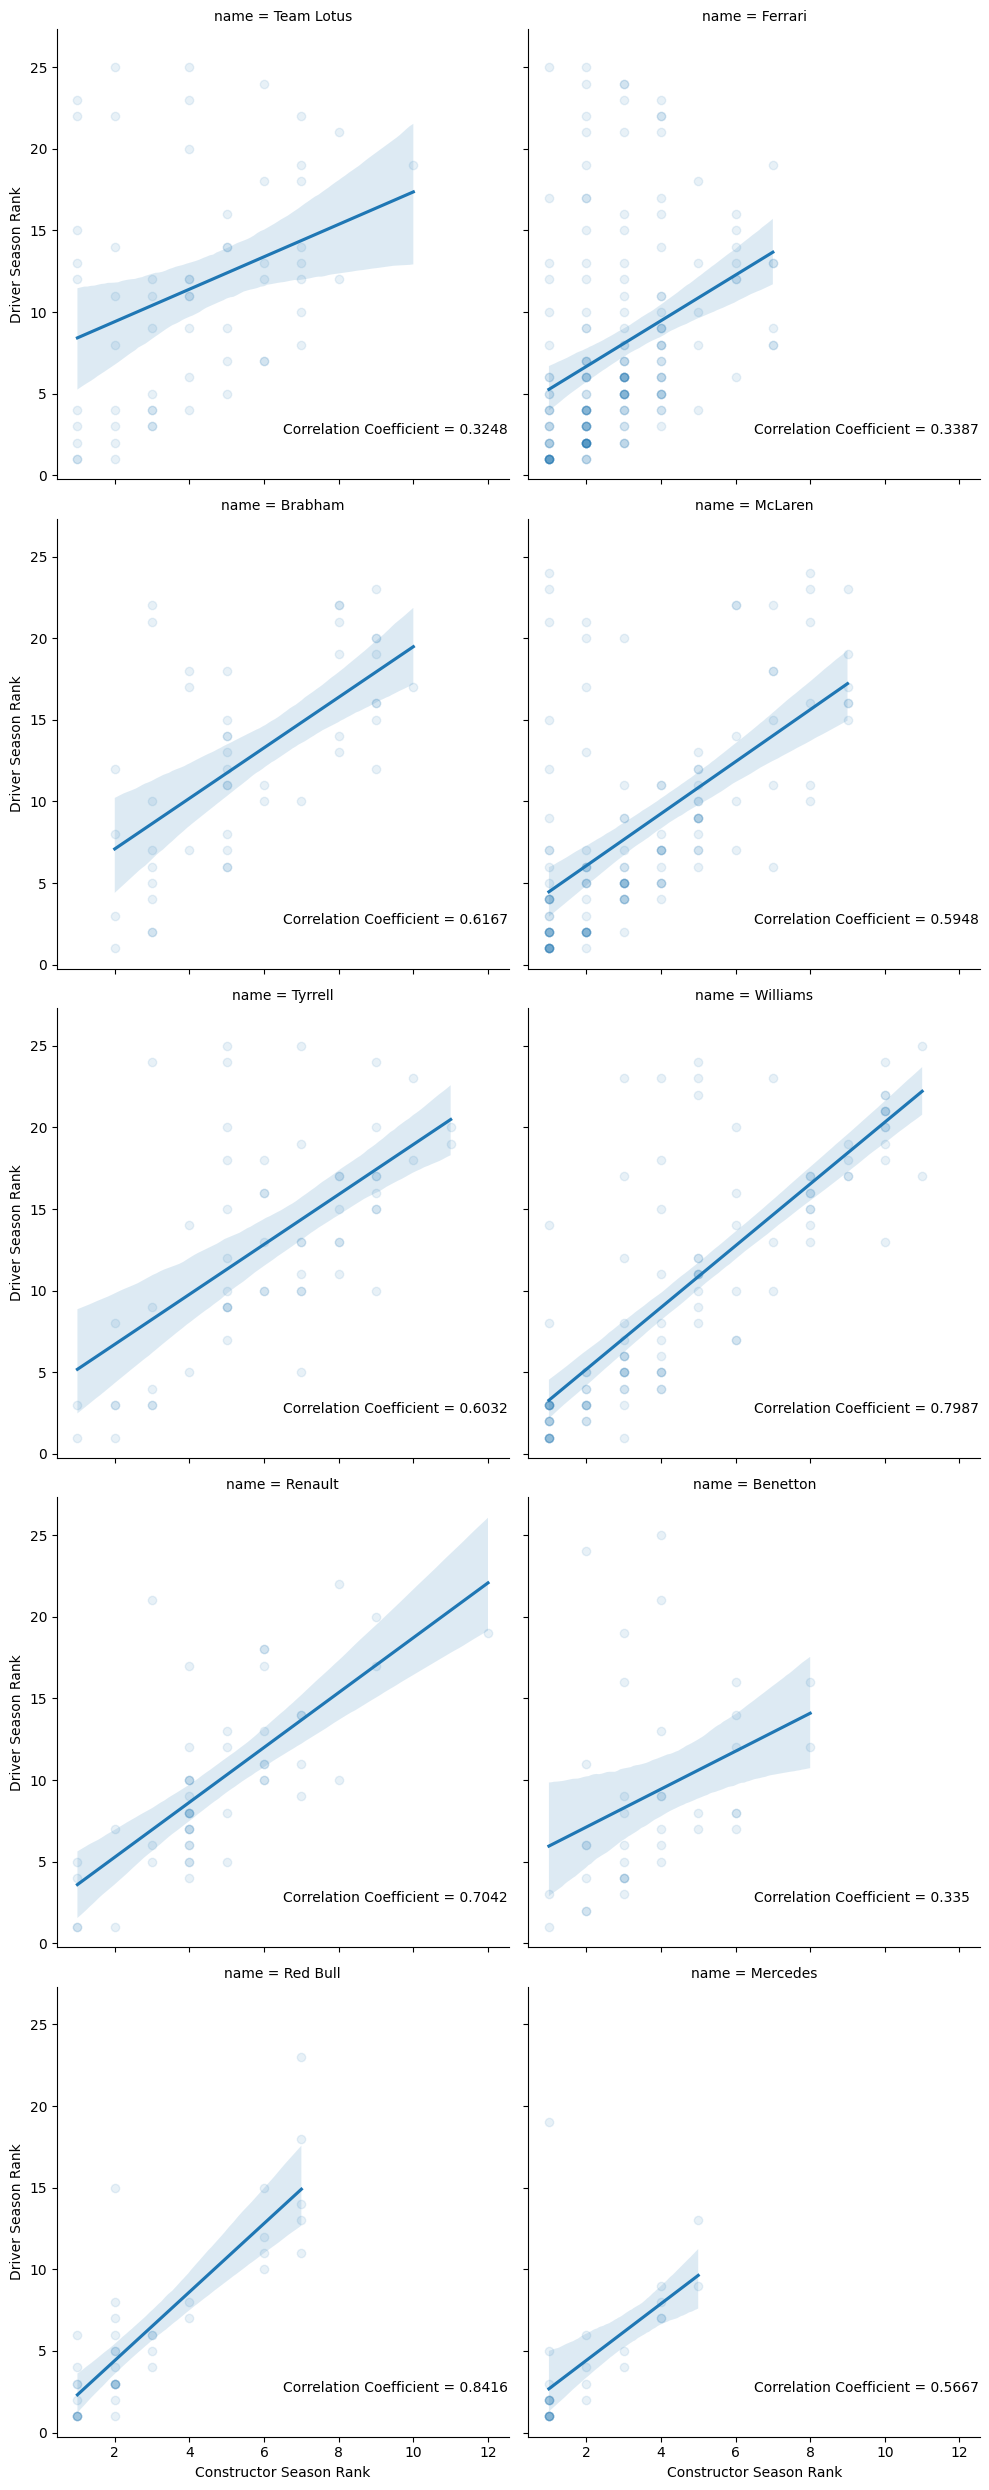

In [130]:
# plot showing the relationship between driver and constructor rankings for each of the top 10
# teams individually

top10_teams = []
for i in range(len(driver_data)):
    if driver_data['name'][i] in most_points[-10:]:
        top10_teams.append(i)
        
only_top10_teams = driver_data.iloc[top10_teams]

g = sns.lmplot(x='Constructor Season Rank',y='Driver Season Rank',data=only_top10_teams,\
               scatter_kws={'alpha':0.1},col='name',col_wrap=2);

def annotate(data, **kws):
    r = stats.pearsonr(data['Constructor Season Rank'],\
                       data['Driver Season Rank'])[0]
    ax = plt.gca()
    ax.text(0.5, .1, f"Correlation Coefficient = {np.round(r,4)}", transform=ax.transAxes)

g.map_dataframe(annotate);

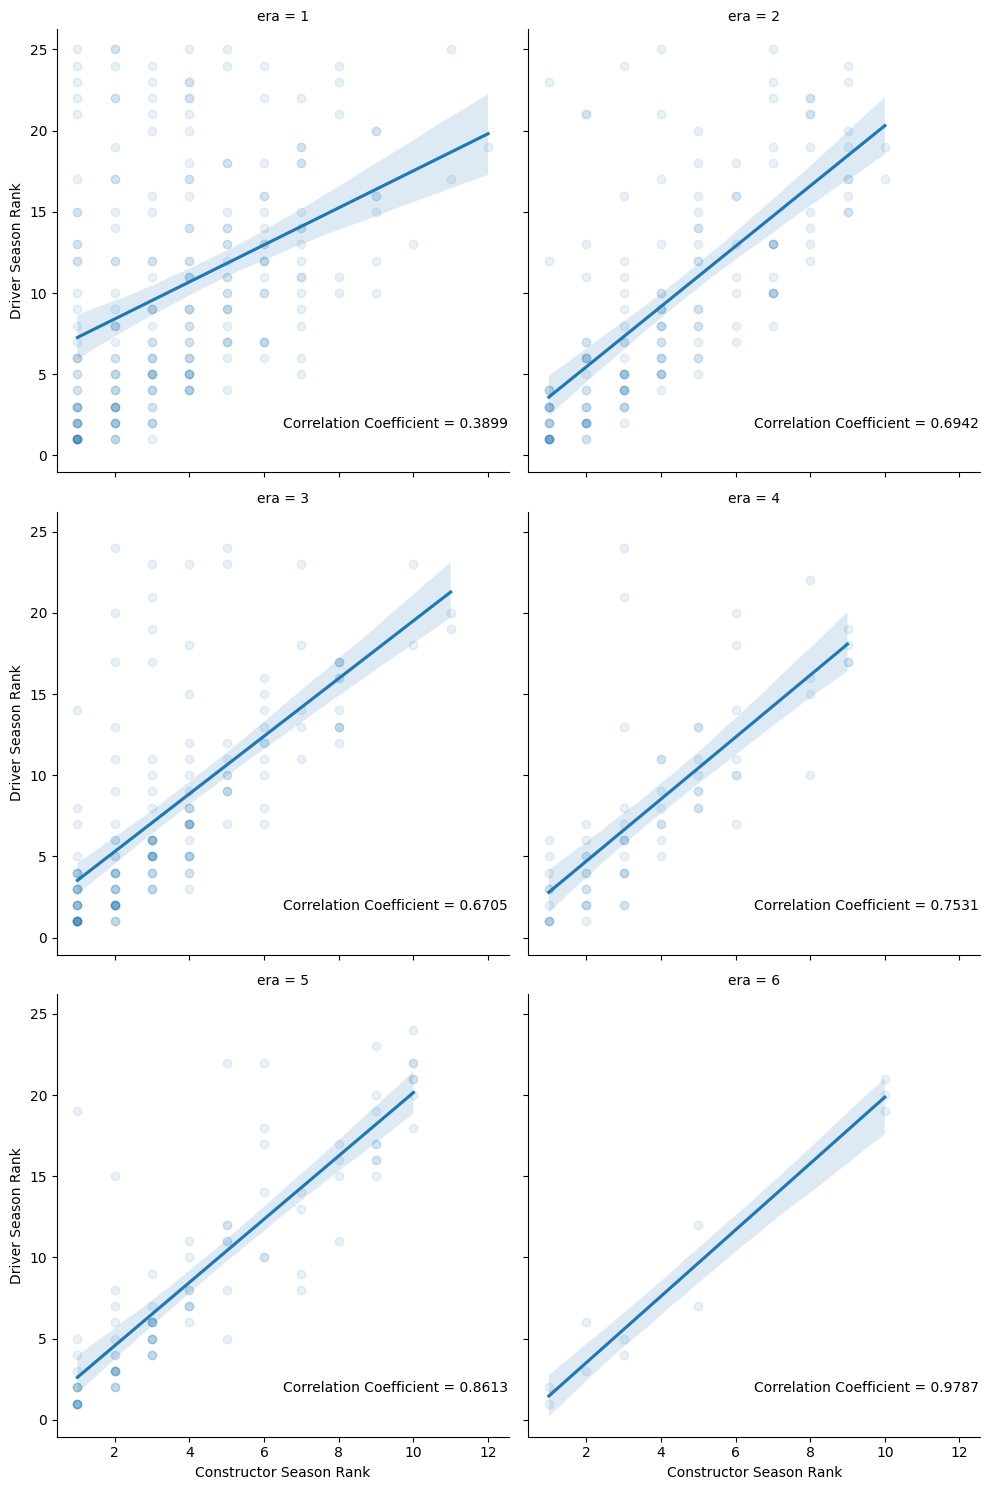

In [136]:
# correlation between driver and constructor rankings for the top 10 constructors by era

top10_teams = []
for i in range(len(driver_data)):
    if driver_data['name'][i] in most_points[-10:]:
        top10_teams.append(i)
        
only_top10_teams = driver_data.iloc[top10_teams]

g = sns.lmplot(x='Constructor Season Rank',y='Driver Season Rank',data=only_top10_teams,\
               scatter_kws={'alpha':0.1},col='era',col_wrap=2);

def annotate(data, **kws):
    r = stats.pearsonr(data['Constructor Season Rank'],\
                       data['Driver Season Rank'])[0]
    ax = plt.gca()
    ax.text(0.5, .1, f"Correlation Coefficient = {np.round(r,4)}", transform=ax.transAxes)

g.map_dataframe(annotate);

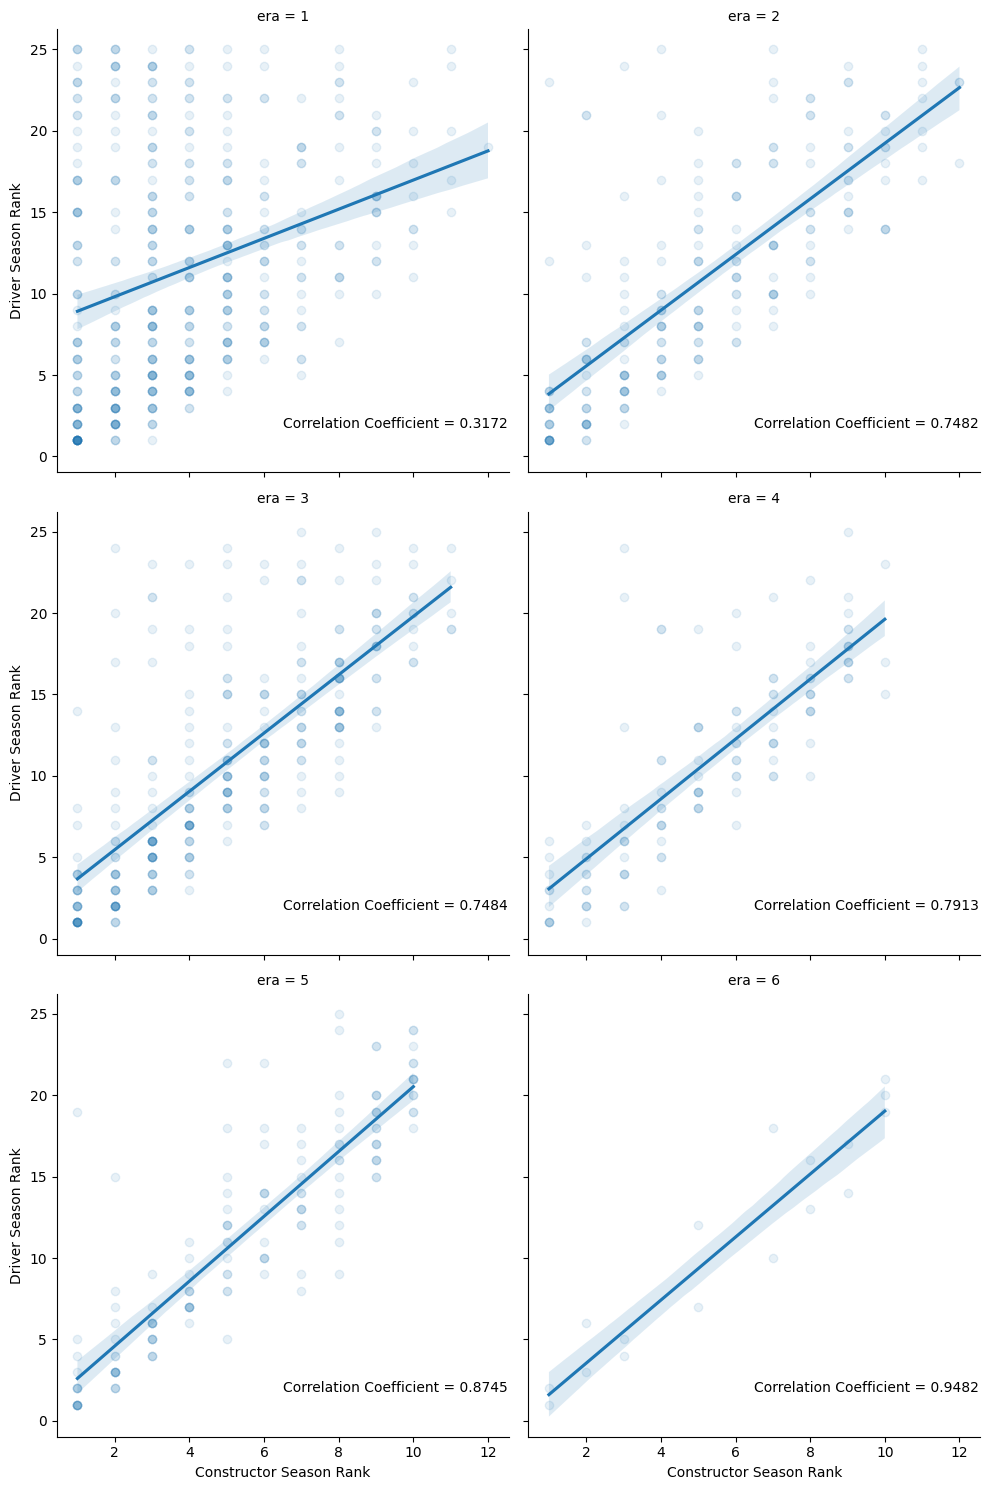

In [137]:
# correlation between driver and constructor rankings for the top 30 constructors by era

top30_teams = []
for i in range(len(driver_data)):
    if driver_data['name'][i] in most_points[-30:]:
        top30_teams.append(i)
        
only_top30_teams = driver_data.iloc[top30_teams]

g = sns.lmplot(x='Constructor Season Rank',y='Driver Season Rank',data=only_top30_teams,\
               scatter_kws={'alpha':0.1},col='era',col_wrap=2);

def annotate(data, **kws):
    r = stats.pearsonr(data['Constructor Season Rank'],\
                       data['Driver Season Rank'])[0]
    ax = plt.gca()
    ax.text(0.5, .1, f"Correlation Coefficient = {np.round(r,4)}", transform=ax.transAxes)

g.map_dataframe(annotate);